In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

warnings.filterwarnings('ignore')

In [79]:
df= pd.read_csv('Data.csv')
df.head()

,Account No,August 2022,September 2022,October 2022,November 2022,December 2022,January 2023,February 2023,March 2023,April 2023,May 2023,June 2023,July 2023,August 2023,September 2023,October 2023,November 2023,December 2023,January 2024
0,400000081726,96,109,126,113,90,63,64,77,97,119,137,132,118,93,104,114,84,80
1,400000081793,180,152,158,169,140,118,116,125,148,175,192,207,192,160,186,185,154,122
2,400000081807,745,870,659,613,425,364,334,505,626,714,852,899,779,591,658,570,368,363
3,400000081815,511,495,412,286,222,178,177,254,559,620,760,443,330,339,387,345,292,210
4,400000081823,983,582,472,463,332,230,212,292,346,430,479,463,428,405,419,418,270,211


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1535 entries, 0 to 1534
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Account No      1535 non-null   int64
 1   August 2022     1535 non-null   int64
 2   September 2022  1535 non-null   int64
 3   October 2022    1535 non-null   int64
 4   November 2022   1535 non-null   int64
 5   December 2022   1535 non-null   int64
 6   January 2023    1535 non-null   int64
 7   February 2023   1535 non-null   int64
 8   March 2023      1535 non-null   int64
 9   April 2023      1535 non-null   int64
 10  May 2023        1535 non-null   int64
 11  June 2023       1535 non-null   int64
 12  July 2023       1535 non-null   int64
 13  August 2023     1535 non-null   int64
 14  September 2023  1535 non-null   int64
 15  October 2023    1535 non-null   int64
 16  November 2023   1535 non-null   int64
 17  December 2023   1535 non-null   int64
 18  January 2024    1535 non-nul

In [81]:
# we dont really need account no for our model
df = df.drop('Account No', axis=1)
df_shifted = df.shift(-1, axis=1)

X = df.iloc[:, :-1].values
y = df_shifted.iloc[:, 1].values

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
# Initialize and train the random forest regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [84]:
# Predict and evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')

Mean Squared Error: 4.993744625407185


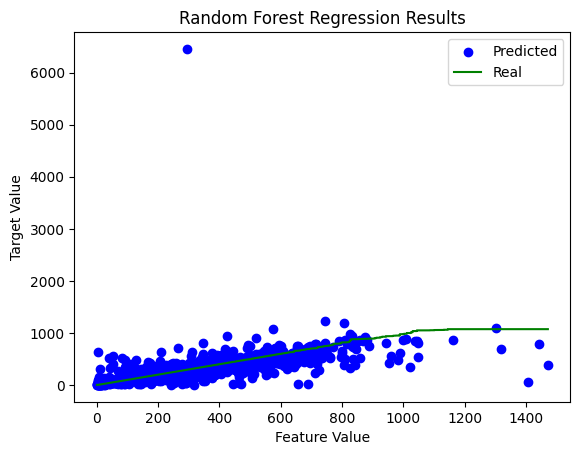

In [85]:
X_column = X[:, 0]

# Create the grid of values for the selected feature
X_grid = np.arange(min(X_column), max(X_column), 0.01)
X_grid = X_grid.reshape(len(X_grid), 1)

# Plot the real data points
plt.scatter(X_column, y, color='blue')

# Plot the predicted values using the model
plt.plot(X_grid, model.predict(np.hstack([X_grid] * X.shape[1])), color='green')

plt.title("Random Forest Regression Results")
plt.xlabel('Feature Value')
plt.ylabel('Target Value')
plt.legend(['Predicted', 'Real'])
plt.show()